# Run Main.py then Run next lines for Bokeh Interactive plot



reading from the following configuration files: 

  ['./config/data/text_files.yaml', './config/data/pdf_files.yaml']




Reading in 2 file(s) from ./config/data/text_files.yaml






Reading in 54 file(s) from ./config/data/pdf_files.yaml


doc_names

 ['adventure', 'pride_and_prejudice', 'Addendum to the report of the Islamic Maghreb', 'Administrative instructions', 'AQ Accounting Ledger', 'Draft of a letter to subordinates', 'Duties of administrators', 'General instructions', 'In regard to the money that is in Sudan', 'Instructions to subordinates', 'Jihad in Pakistan', 'Kind brother', 'Letter about efforts in other regions', 'Letter about logistics', 'Letter about matter of the Islamic Maghreb', 'Letter confirming receipt of money', 'Letter directing allocation of funds', 'Letter from Abdallah Abu Zayd Abd-al-Hamid to Abu Mus ab Abd-al-Wadud', 'Letter from Abu Yahya', 'Letter from Abu-Abdallah al-Halabi', 'Letter from Atiyah to Abu Basir', 'Letter of guidance on leadership', 'Let



algorithm: word_frequency

result:

            Word  Word Count
2104        god         471
156          al         430
695     brother         350
3735      peopl         347
176       allah         339
3556        one         323
5434         us         309
2667      islam         279
5678      would         273
3322     muslim         263
2731      jihad         250
3672       page         233
1963     follow         190
3147        may         187
2680       issu         186
5177       time         182
1606      enemi         179
195        also         175
3305  mujahidin         175
5415       upon         175
1079    countri         175
2496     import         166
5665       work         164
1527      egypt         159
4859      state         158
2115     govern         155
4184     region         144
4716     situat         142
362         ask         141
3382       need         139
...         ...         ...
1874     faysal           1
1873    fayizah           1
3945  pro

AttributeError: 'kmean_hist' object has no attribute 'modeldum'

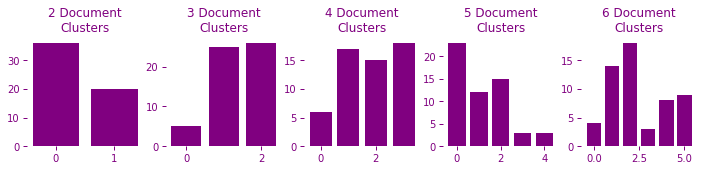

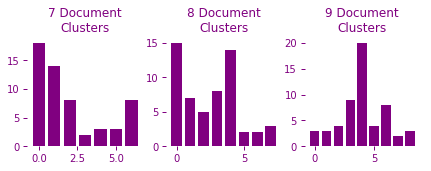

In [109]:
%run main.py

# Bokeh Imports

In [104]:
import pandas as pd

from bokeh.io import output_notebook, output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.layouts import column, row, WidgetBox
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs, TextInput, Panel, RadioButtonGroup
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxSelectTool, CrosshairTool, SaveTool, Div, PanTool

output_notebook()
output_file('Bokeh_Test.html')

Loading BokehJS ...

INFO:bokeh.io.state:Session output file 'Bokeh_Test.html' already exists, will be overwritten.


# Load ScatterPlot DataFrame

In [110]:
# filename = 'Bokeh Resume Test.xlsx'
filename = 'Bokeh_Test.xlsx'

df = pd.read_excel(filename)

cluster_sets = [str(i).zfill(2) for i in range(2,len(df.columns) - 1)]

dataset = dict()
for colname in df.columns:
#     print(colname)
    if colname in ['x','y','docname']:
        dataset[colname.replace(' ','')] = df[colname].tolist()
    else:
        dataset[str(colname)] = [[c[1:-2].split(", '")[0].strip(),c[1:-2].split(", '")[1].strip()] for c in df[colname].tolist()]
#         dataset[str(colname)] = [c[1:-2].split(", '")[1].strip() for c in resumes[colname].tolist()]
#         dataset['ClusterId'] = [c[1:-2].split(", '")[0].strip() for c in resumes[colname].tolist()]
        
## Starting Color (Gray)
dataset['color'] = ['lightgray'] * len(df)

## Starting size
starting_size = 15
dataset['size'] = [starting_size] * len(df)

## Starting size
dataset['ClusterId'] = [0] * len(df)

# Plot ScatterPlot on Bokeh

In [111]:
import random

cluster_sets = [str(i).zfill(2) for i in range(2,len(df.columns) - 1)]

source = ColumnDataSource(dataset)

## Configure the HoverTool popup dialog
hover = HoverTool(tooltips=[('Document Name', '@docname'),('Cluster Id','@ClusterId')])    

## Create a Bokeh figure object
p = figure(plot_width=600, plot_height=400, 
           tools = [hover,BoxSelectTool(),CrosshairTool(),SaveTool(),PanTool()], toolbar_location="above",
           title = 'Bokeh')

# add a circle renderer with a size, color, and alpha
p.circle('x', 'y', size = 'size', source = source,
         line_color = 'dimgray', line_width = 0.1,
         fill_color = 'color', fill_alpha = 0.6)

def size_callback(source=source, window=None):
    
    data = source.data
    new_size = cb_obj.value
    
    data['size'] = [new_size] * len(data['size'])
        
    source.change.emit()
        
def color_callback(source=source, window=None):
    
    print('ColorCALLBACK!!!')
    
    global color_dict
    
    data = source.data
    new_color = cb_obj.active
    
    data['color'] = [c[1] for c in data[str(new_color + 2)]]
    data['ClusterId'] = [c[0] for c in data[str(new_color + 2)]]
        
    source.change.emit()
    
## Slider to set size of dots
size_of_dots = Slider(start = 1, end = 100, step = 1, value = starting_size,
                        title = 'Scatter Plot Document Size', callback=CustomJS.from_py_func(size_callback))

## Radio Buttons to set color of dots
clusters = RadioButtonGroup(labels = cluster_sets, name = 'Number of Clusters', #active = 0,
                            callback=CustomJS.from_py_func(color_callback))

layout = column(size_of_dots, clusters, p)

show(layout)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='63a3f323-ac0c-44a5-9e87-da9a1d6ac092', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='98852ba5-fe9f-456c-8cee-37a3bd58cc8b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='95b5957d-af34-4665-8314-8e8977077f9f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='cee58948-f8b3-43d3-93ae-8b5fa7a14788', ...)]


# Load BOW DataFrame

In [113]:
filename = 'BOW.xlsx'

df = pd.read_excel(filename)

dataset = dict()
for colname in df.columns:
#     print(colname)
    if colname in ['Word','Word Count']:
        dataset[colname.replace(' ','')] = df[colname].tolist()
    else:
        dataset[str(colname)] = [[c[1:-2].split(", '")[0].strip(),c[1:-2].split(", '")[1].strip()] for c in df[colname].tolist()]

# Plot BOW BarGraph

In [118]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral10
from bokeh.plotting import figure

output_file("bag_of_word.html")

yheight = max(dataset['WordCount']) + 10

p = figure(x_range=dataset['Word'], y_range= (0, yheight), plot_height=350, title="Top 10 Terms in Documents",
           toolbar_location=None, tools="")

p.vbar(x= dataset['Word'], top= dataset['WordCount'], width = 0.9, color='purple')

#, width=0.9, color='color', legend=dataset['Word'], source=source

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

INFO:bokeh.io.state:Session output file 'bag_of_word.html' already exists, will be overwritten.


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='63a3f323-ac0c-44a5-9e87-da9a1d6ac092', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='98852ba5-fe9f-456c-8cee-37a3bd58cc8b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='95b5957d-af34-4665-8314-8e8977077f9f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: color [renderer: GlyphRenderer(id='cee58948-f8b3-43d3-93ae-8b5fa7a14788', ...)]
